In [1]:
# conda install -c conda-forge python-snappy snappy fastparquet
# conda install -c conda-forge umap-learn

In [2]:
#pip install pyarrow

In [28]:
#pip install umap-learn

In [3]:
#pip install umap-learn[plot]

In [4]:
#import pyarrow.parquet as pq
#from pyarrow import csv

In [5]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

from sklearn.preprocessing import StandardScaler

import umap
import umap.plot

import warnings
warnings.filterwarnings('ignore')
#import fastparquet
#import pyarrow

In [6]:
data_path = os.path.join(os.getcwd(), 'data')
files = os.listdir(data_path)[1:]

In [7]:
#files

In [8]:
aisles = pd.read_csv(os.path.join(data_path,files[0]))
departments = pd.read_csv(os.path.join(data_path,files[1]))
orders = pd.read_csv(os.path.join(data_path,files[2]))
orders_products_prior = pd.read_csv(os.path.join(data_path,files[3]))
orders_products_train = pd.read_csv(os.path.join(data_path,files[4]))
products = pd.read_csv(os.path.join(data_path,files[5]))

In [29]:
#prior = orders[orders['eval_set']== 'prior']
#train = orders[orders['eval_set'] == 'train']
#test = orders[orders['eval_set'] == 'test']
#del train['eval_set'], test['eval_set'], prior['eval_set']

#temp = orders_products_train.set_index('order_id')
#orders_train = pd.merge(temp, train, on='order_id')

#temp = orders_products_prior.set_index('order_id')
#orders_prior = pd.merge(temp, prior, on='order_id')

#total_orders = pd.concat([orders_prior, orders_train])
#temp = pd.merge(total_orders,products , on='product_id')
#temp = pd.merge(temp, aisles, on='aisle_id')
#temp = pd.merge(temp, departments, on='department_id')

#temp.to_csv('total_order.csv', index=False)

In [10]:
#total_orders = pd.read_parquet('total_order.parquet', engine='fastparquet')

In [11]:
total_orders = pd.read_csv('total_order.csv')

In [12]:
total_orders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,153404,2,0,16,7.0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,23750,11,6,8,10.0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,58707,21,6,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,166654,48,0,12,9.0,Organic Egg Whites,86,16,eggs,dairy eggs


## 주요 주문 시간대

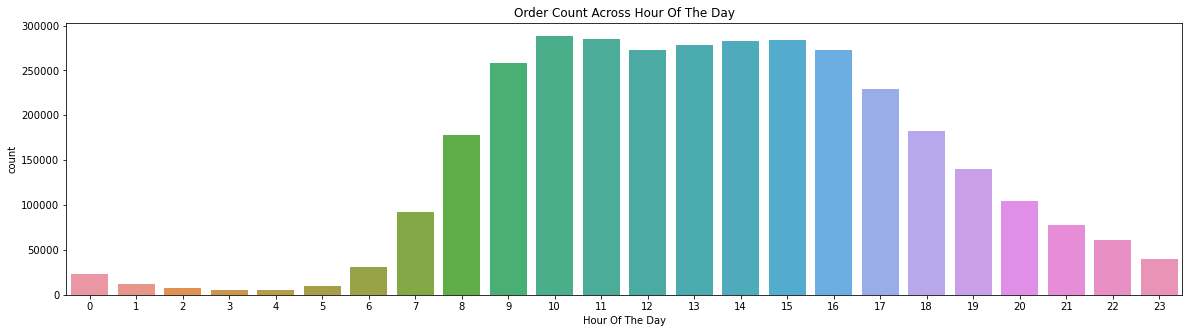

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
#sns.color_palette('Spectral', as_cmap=True)
sns.color_palette("tab10")
sns.countplot(data=orders, x="order_hour_of_day", ax=ax)
ax.set(xlabel="Hour Of The Day", title="Order Count Across Hour Of The Day")
plt.show()

일반적인 근무시간대? 활동시간대에 주로 구매하고 계십니다

### 주문을 많이 하는 요일

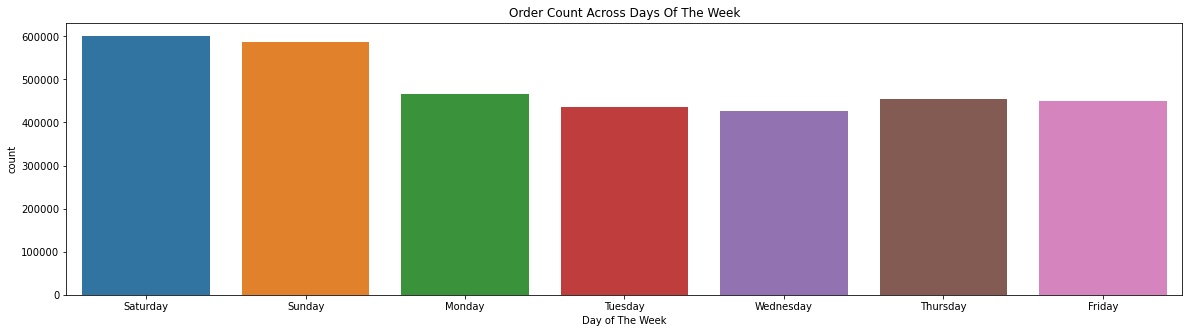

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
orders_day = orders[['order_dow']].replace({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
sns.countplot(data=orders_day, x='order_dow', ax=ax, order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
ax.set(xlabel='Day of The Week', title='Order Count Across Days Of The Week')
plt.show()

(요일이 숫자로 되있었지만, 가장 구매가 많은 날을 토,일로 정했습니다.)  
토요일, 일요일이 구매량이 가장 많고, 평일에는 비슷한 경향을 보입니다

### 사람들은 언제 재주문 하는가

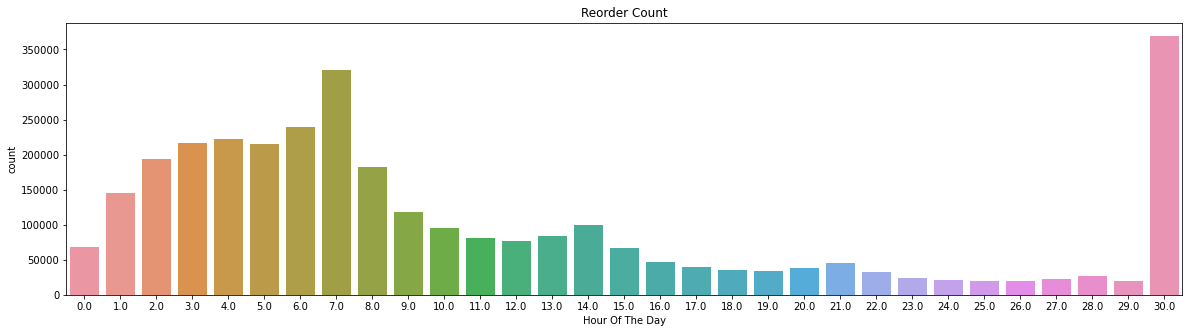

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(data=orders, x='days_since_prior_order', ax=ax)
ax.set(xlabel='Hour Of The Day', title='Reorder Count')
plt.show()

구매후 30일, 7일째에 가장 많이 구매하고, 14, 21, 28일처럼 1주마다 소폭 상승하는 경향이 보입니다  
-> 30일 이후는 다 30일로 표기한다는 걸까요? 30일이 너무 많네요

### 사람들이 주문한 횟수

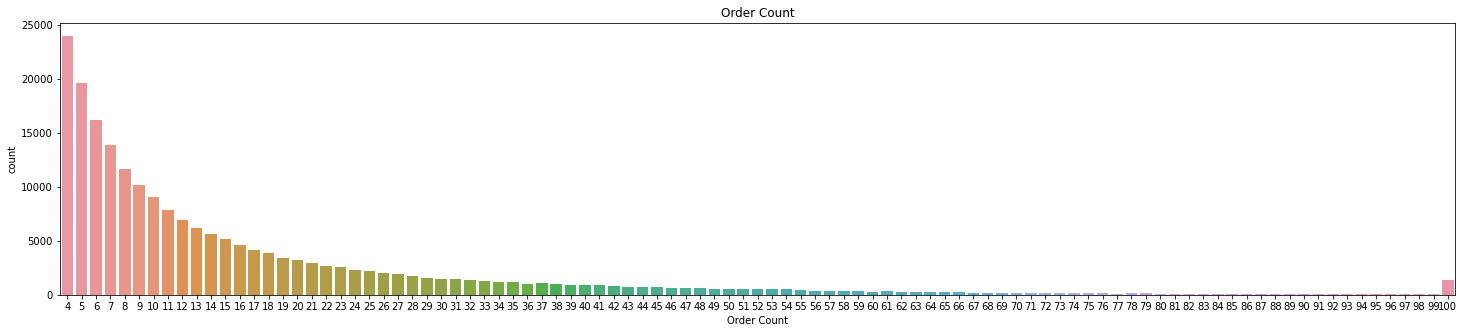

In [16]:
order_count = orders.groupby(by=['user_id'])['order_id'].count().to_frame()
fig, ax = plt.subplots()
fig.set_size_inches(25, 5)
sns.countplot(data=order_count, x='order_id', ax=ax)
ax.set(xlabel='Order Count', title='Order Count')
plt.show()

### 한번 주문할때 얼마나 사는지

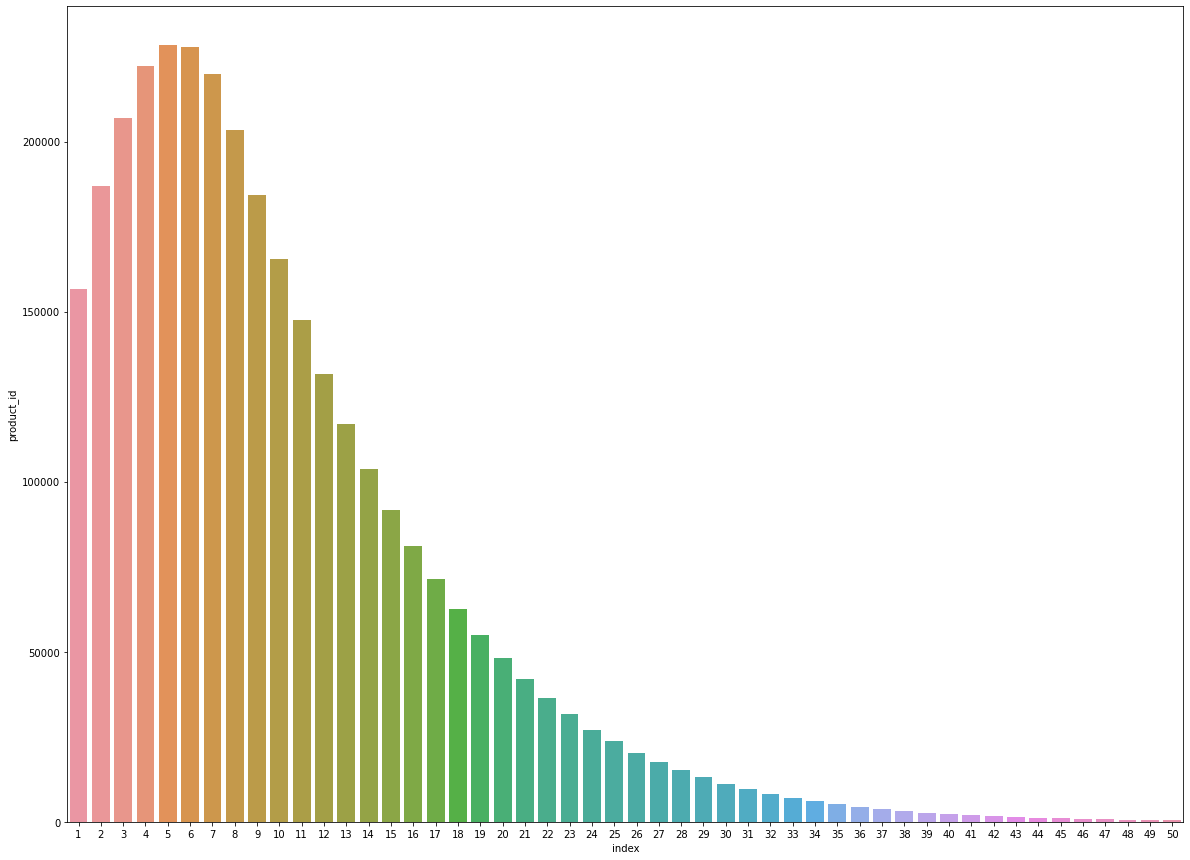

In [17]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 15)
order_product = orders_products_prior.groupby("order_id")["product_id"].count().to_frame()["product_id"].value_counts().to_frame().reset_index().head(50)
sns.barplot(data=order_product, x="index", y="product_id")
plt.show()

한번에 5~6종류를 가장 많이 구매하시네요

### 가장 많이 팔린 제품

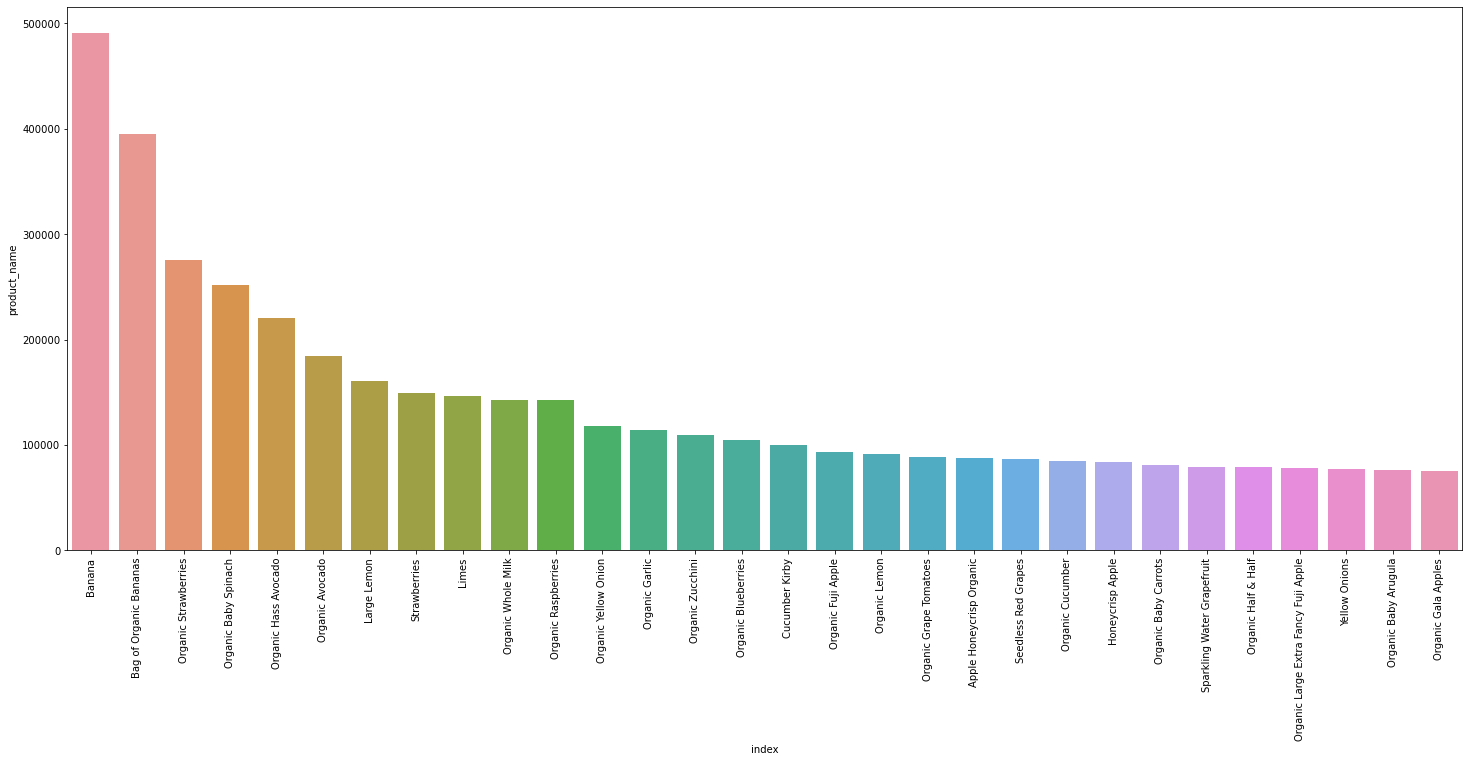

In [18]:
product_count = total_orders['product_name'].value_counts().to_frame().reset_index().head(30)
fig, ax = plt.subplots()
fig.set_size_inches(25, 10)
g = sns.barplot(data=product_count, x="index", y='product_name')
plt.xticks(rotation=90)
plt.show()

바나나, 딸기, 시금치, 아보카도가 잘팔리고, 양파, 루꼴라, 갈라 사과가 적게 팔리고 있네요.

### 가장 많이 팔린 aisle

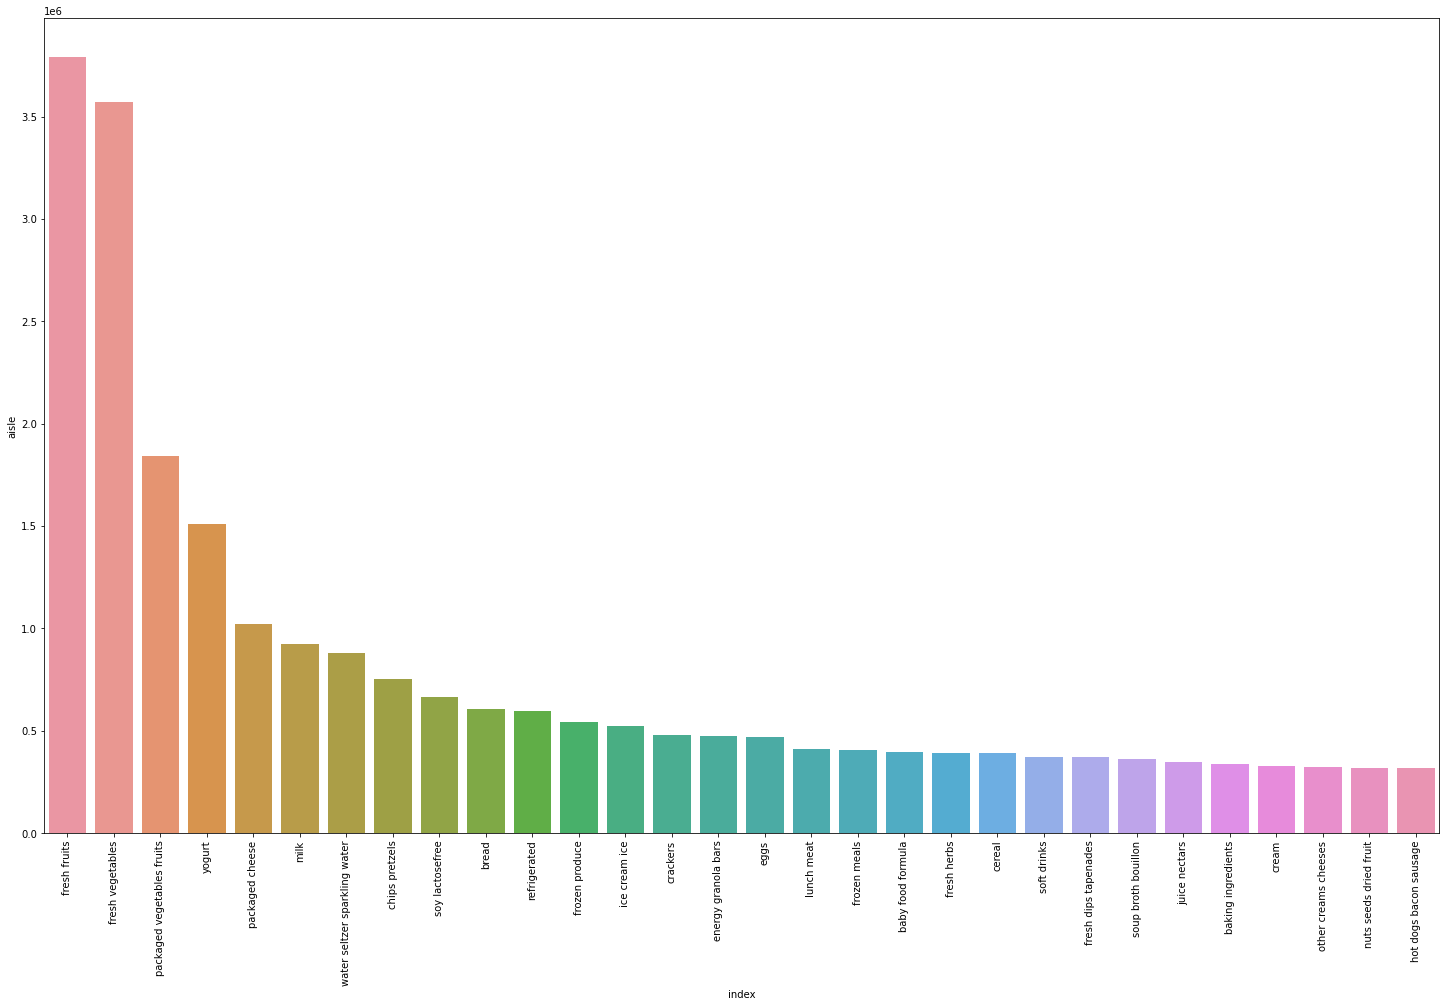

In [19]:
aisle_count = total_orders['aisle'].value_counts().to_frame().reset_index().head(30)

fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(data=aisle_count, x='index', y='aisle', )
plt.xticks(rotation=90)
plt.show()

과일, 채소, 유제품류가 많이 팔리고, 크림, 건과일, 가공육류가 적게 팔리고있네요.

### 가장 많이 팔린 department

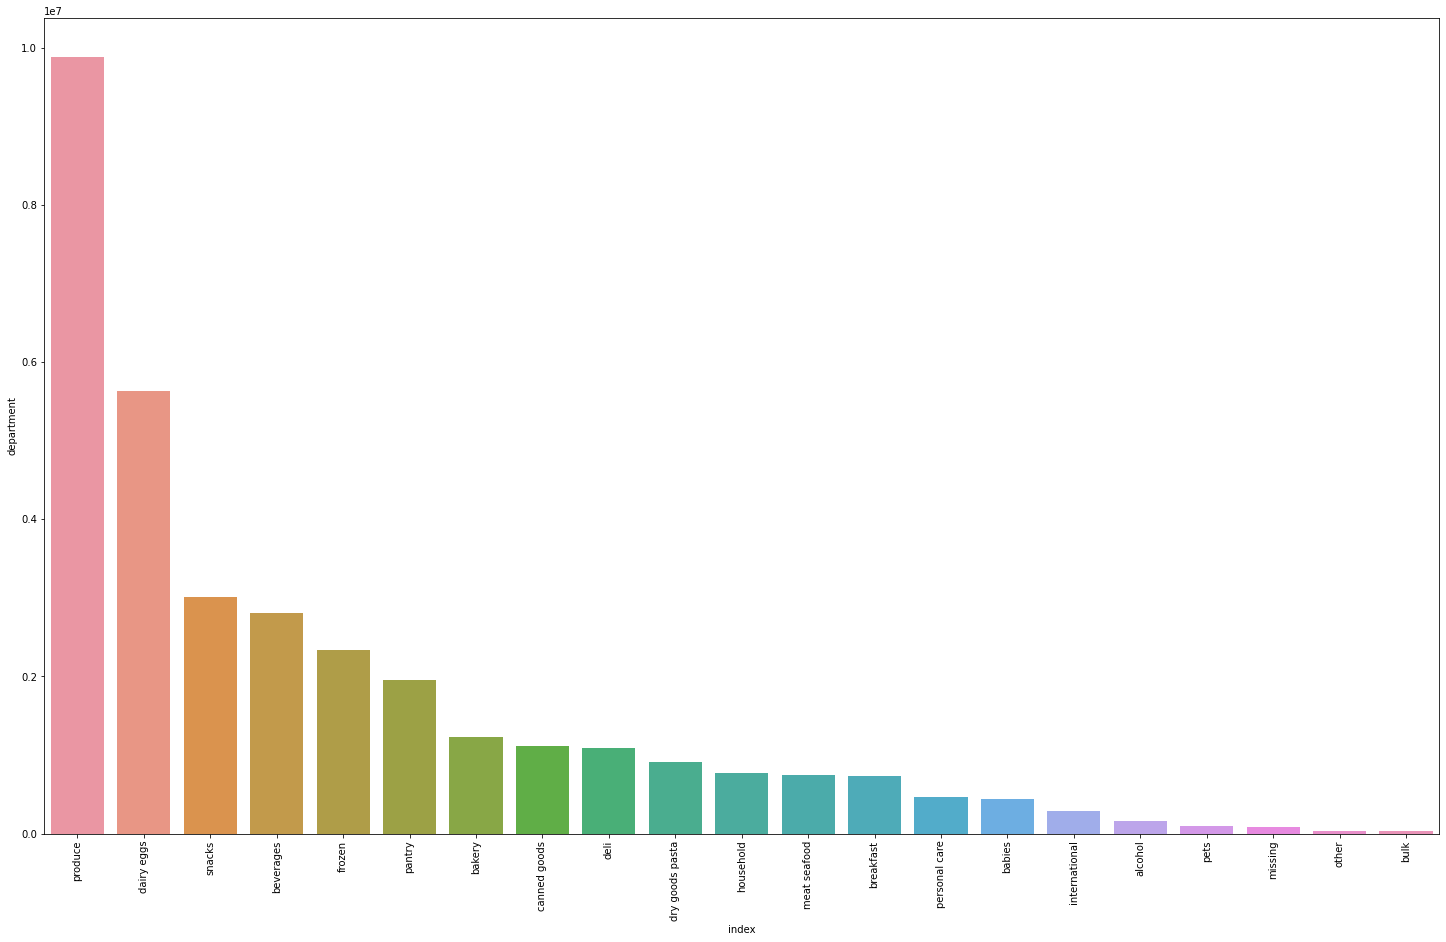

In [20]:
department_count = total_orders['department'].value_counts().to_frame().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
sns.barplot(data=department_count, x='index', y='department')
plt.xticks(rotation=90)
plt.show()

produce 채집품? 채소, 허브, 과일?

In [21]:
total_orders[total_orders['department'] == 'produce'].tail(20)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
15519425,916319,22010,8,0,56017,8,0,12,10.0,Italian Herbs Paste,16,4,fresh herbs,produce
15519426,1030250,22010,36,0,149704,5,2,12,13.0,Italian Herbs Paste,16,4,fresh herbs,produce
15519427,1269476,22010,19,0,7100,16,2,11,30.0,Italian Herbs Paste,16,4,fresh herbs,produce
15519428,1866457,22010,33,0,103732,13,3,9,8.0,Italian Herbs Paste,16,4,fresh herbs,produce
15519429,2443700,22010,25,0,17265,3,1,16,9.0,Italian Herbs Paste,16,4,fresh herbs,produce
15519430,2861768,22010,5,0,40540,4,3,14,6.0,Italian Herbs Paste,16,4,fresh herbs,produce
15519431,990818,7614,12,0,199065,6,0,14,18.0,Herbs Lime Leaves,16,4,fresh herbs,produce
15519432,1956949,7614,1,1,157818,9,3,14,30.0,Herbs Lime Leaves,16,4,fresh herbs,produce
15519433,1990232,7614,1,0,157818,3,2,13,1.0,Herbs Lime Leaves,16,4,fresh herbs,produce
15519434,3229638,7614,6,1,157818,4,6,21,4.0,Herbs Lime Leaves,16,4,fresh herbs,produce


### 요일별 가장 많이 팔린 상품

In [22]:
col_1, col_2 = [], []
for i in range(7):
    row = total_orders[total_orders['order_dow'] == i]['product_name'].value_counts().to_frame().iloc[0]
    col_1.append(row.name)
    col_2.append(row.product_name)
dow_product = pd.DataFrame([x for x in zip(col_1, col_2)])
dow_product.columns = ['product_name', 'count']
dow_product

,product_name,count
0,Banana,101474
1,Banana,90750
2,Banana,62002
3,Banana,55334
4,Banana,54447
5,Banana,61281
6,Banana,66003


요일별 가장 많이 팔린 상품은 바나나입니다.

### 시간대별 가장 많이 팔린 상품 

In [23]:
col_3, col_4 = [], []
for i in range(24):
    row = total_orders[total_orders['order_hour_of_day'] == i]['product_name'].value_counts().to_frame().iloc[0]
    col_3.append(row.name)
    col_4.append(row.product_name)
hour_product = pd.DataFrame([x for x in zip(col_3, col_4)])
hour_product.columns = ['product_name', 'count']
hour_product

,product_name,count
0,Banana,2915
1,Banana,1467
2,Banana,867
3,Banana,612
4,Banana,713
5,Banana,1368
6,Banana,4943
7,Banana,15060
8,Banana,28445
9,Banana,39352


시간대별 가장 많이 팔린 상품은 바나나입니다. 신기하네요  

밑은 혹시 몰라서 가장 많이 팔린 시간대와 가장 적게 팔린 시간대에 판매상품 순위에요

In [24]:
total_orders[total_orders['order_hour_of_day'] == 10]['product_name'].value_counts().to_frame().head(20)

,product_name
Banana,42234
Bag of Organic Bananas,33063
Organic Strawberries,21995
Organic Baby Spinach,20566
Organic Hass Avocado,17847
Organic Avocado,15027
Large Lemon,13764
Strawberries,12763
Limes,12454
Organic Raspberries,11937


In [25]:
total_orders[total_orders['order_hour_of_day'] == 3]['product_name'].value_counts().to_frame().head(20)

,product_name
Banana,612
Bag of Organic Bananas,600
Organic Baby Spinach,404
Organic Strawberries,344
Organic Hass Avocado,334
Organic Avocado,247
Large Lemon,240
Limes,192
Strawberries,188
Organic Garlic,179


가장 많이 팔린 시간대인 10시에 오시는 분들보다 새벽 3시에 오시는 분들은 바나나 낱개보다는 바나나 가방?의 구매비율이 높네요

### 개인 구매품목 관련

In [26]:
total_orders[total_orders['user_id'] == 1][total_orders['order_id'] == 2550362]['product_name'].to_frame()

,product_name
619383,0% Greek Strained Yogurt
2108933,Organic Unsweetened Almond Milk
4187825,Organic String Cheese
22021354,Milk Chocolate Almonds
22296218,Original Beef Jerky
22477423,Pistachios
23236259,Cinnamon Toast Crunch
25615318,Soda
25793705,Zero Calorie Cola


In [27]:
total_orders[total_orders['user_id'] == 1][total_orders['order_id'] == 1187899]['product_name'].to_frame()

,product_name
622922,0% Greek Strained Yogurt
2824115,Organic Whole Milk
4189479,Organic String Cheese
4666511,Organic Half & Half
22022753,Milk Chocolate Almonds
22275372,Aged White Cheddar Popcorn
22477964,Pistachios
23237245,Cinnamon Toast Crunch
25625070,Soda
25796052,Zero Calorie Cola


0% Greek Strained Yogurt, Organic String Cheese, Milk Chocolate Almonds 등 처럼 개인마다 주문마다 공통적으로 구매하는 물품이 존재